red wine 과 white wine 테이블 합치기

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


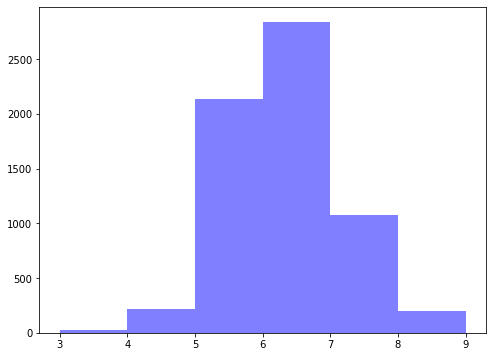

In [ ]:
import pandas as pd

#read_csv: csv파일을 읽는 명령 
#sep: 파일이 어떤 기호로 분리되어 있는지 표시하는 것. 여기서는 데이터가 ;로 나누어져 있다.
red_wine = pd.read_csv('./winequality-red.csv', sep = ';')
white_wine = pd.read_csv('./winequality-white.csv', sep = ';')

red_wine['color'] = 1 #새로운 column, color를 추가해서 1로 저장
red_wine.head()
white_wine['color'] = 0
white_wine.head()

#두 pandas dataframe을 하나로 합침
#조건: dataset들의 열 단위가 일치해야 한다. 
wine = pd.concat([red_wine, white_wine])
wine.info()

#quality column의 unique를 확인함
#unique: 유일한 값 찾기
wine['quality'].unique()

import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
#히스토그램 그려주기 
#alpha = 0연함 ~ 1진함 색 진하기의 정도 
plt.hist(wine['quality'], bins = 6, facecolor = 'blue', alpha = 0.5)
plt.show()

wine['quality'].value_counts()
#유일한 값 별 개수 세기 

#저장하기. to_csv명령으로 해당 변수의 내용을 저장할 수 있음. ,로 구분하겠다.
#wine.csv 가 생성되었다는 것을 볼 수 있다. 
wine.to_csv('./wine.csv', sep =',')

둘이 분류 시켜보기

In [ ]:
#y축을 color로 만들겠다.
y = wine['color']
#color를 열(1)단위로 지우겠다. 0이면 행단위
X = wine.drop(['color'], axis = 1)
X.head()

#훈련셋, 테스트셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state = 13)

import numpy as np
np.unique(y_train, return_counts = True)
#(array([0, 1]), array([3913, 1284]))

#logistic regression으로 훈련하기
from sklearn.linear_model import LogisticRegression
#solver: 알고리즘 선택
#C: 정규화를 얼마나 강하게 할 것인가
log_reg = LogisticRegression(random_state = 13, solver = 'liblinear', C = 10.)
log_reg.fit(X_train, y_train)

#훈련용 데이터의 accuracy 확인
from sklearn.metrics import accuracy_score
pred = log_reg.predict(X_train)
accuracy_score(y_train, pred) #와인을 거의 정확하게 분류를 했다
#테스트용 데이터의 accuracy 확인
pred = log_reg.predict(X_test)
accuracy_score(y_test, pred) 

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

#array([[980,   5],
#      [ 11, 304]]) [0인데 0인 것, 0인데 1로 분류 -오차][1인데 1인 것, 1인데 0으로 분류 -오차]

array([[980,   5],
       [ 11, 304]])

seaborn을 활용하자

0.9884615384615385

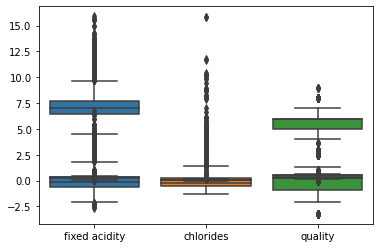

In [ ]:
import seaborn as sns
#특징을 세 개만 사용해서 레드와인, 화이트와인 분류하기
sns.boxplot(data = X[['fixed acidity', 'chlorides', 'quality']])

#특성간 격차를 줄이는 대표적인 방법 - normalization: minmaxscaler, standardscaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler() #최솟값 0, 그리고 최댓값 1이 되도록 스케일링 
SS = StandardScaler() #평균과 표준편차가 같아 지도록 스케일링
MMS.fit(X)
SS.fit(X)
X_mms = MMS.transform(X)
X_ss = SS.transform(X)

#minmaxscaler, standardscaler 두 방법의 차이를 알기 위해 
X_ss_pd = pd.DataFrame(X_ss, columns = X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns = X.columns)

sns.boxplot(data = X_mms_pd[['fixed acidity', 'chlorides', 'quality']])
sns.boxplot(data = X_ss_pd[['fixed acidity', 'chlorides', 'quality']])

#minmaxscaler로 학습한 결과 
X_out = X_mms_pd #mms를 ss로 바꾸면 standardscaler로 학습한 결과를 알 수 있음
X_train, X_test, y_train, y_test = \
train_test_split(X_out, y, test_size = 0.2, random_state = 13)

#logistic regression 학습하기
log_reg = LogisticRegression(random_state = 13, solver = 'liblinear', C = 10.)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)

In [ ]:
#Binarizer를 이용해서 Threshold값 변경 적용 0.5
from sklearn.preprocessing import Binarizer

custom_threshold = 0.9

pred_proba = log_reg.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1) #행 단위에선 전체를, 열에선 red wine(1) 확률만 reshape를 이용해서 column형태로 

In [ ]:
#Threshold = 0.5 예측
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1) #0.5를 기준으로 이상 - red, 이하 - white 값을 나눔
custom_predict[:5] #red이다 white이다 확률을 나타내주는 

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
#Precision, Recall 계산

from sklearn.metrics import accuracy_score, precision_score, recall_score

print ('Threshold : ', custom_threshold)
print ('Accuracy : ', accuracy_score(y_test, custom_predict)) #정답, 예측값
print ('Precision : ', precision_score(y_test, custom_predict))
print ('Recall : ', recall_score(y_test, custom_predict))

Threshold :  0.9
Accuracy :  0.9638461538461538
Precision :  0.9962962962962963
Recall :  0.8539682539682539


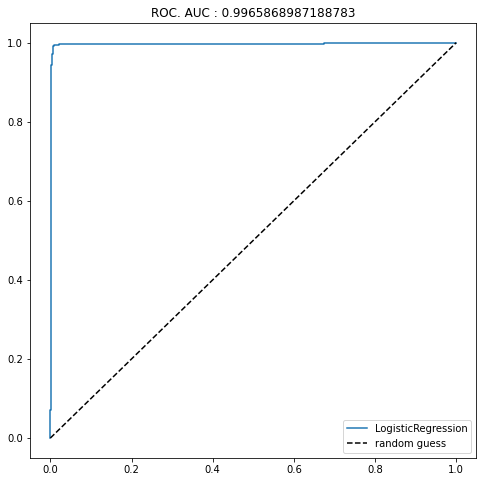

In [ ]:
#ROC 커브 코드
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

pred_proba_1 = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_1)
#fallout 가로 , recall 세로, threshold
#정답, 예측 확률 
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label = 'LogisticRegression')
plt.plot([0, 1], [0, 1], 'k--', label = 'random guess')
#기준선 k: 검은색 실선 
plt.title("ROC. AUC : " + str(roc_auc_score(y_test, pred_proba_1)))
plt.legend()
plt.show()

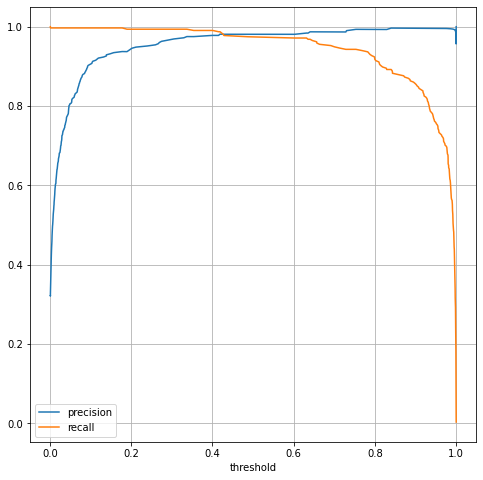

In [ ]:
#Precision Recall 커브 곡선
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_1)

plt.figure(figsize=(8, 8))
plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.legend()
plt.grid()
plt.xlabel('threshold')
plt.show()